 # Cvičení 12. Neparametrické testy, testy dobré shody
 ## Michal Béreš, Martina Litschmannová, Adéla Vrtková

# Testování shody rozdělení pravděpodobnosti diskrétní NV (o konečném počtu hodnot) - test dobré shody
- testujeme zda naměřená data (jejich relativní četnosti) souhlasí s nějakým konkrétním rozdělením (tedy jeho pravděpodobnostmi)
- testujeme pomocí $\chi^2$ testu dobré shody 
- předpoklady testu: (POZOR týkají se předpokládaných četností - tedy těch které bychom sledovali pokud by naměřená data byla 100% dle rozdělení v hypotéze)
    - Očekávané četnosti ≥ 2, 
    - alespoň 80% očekávaných četností > 5 
- testová statistika (ta která má $\chi^2$ rozdělení) je $G = \sum_{i = 1}^k (O_i - E_i)^2 / E_i$
- rozdělení ma stupeň volnosti $df = k - 1 - h$
    - k je počet možností
    - h je počet odhadovaných parametrů (toto se týká neúplně specifikovaných testů)

In [ ]:
# ukázka viz příklad 1


## Test dobré shody pro spojitou náhodnou veličinu (případně diskrétní o nekonežném počtu hodnot)
- musíme převést na tabulku s konečným počtem hodnot
- u diskrétní (např. poison) shlukneme od určitého  počtu kolonek např. 4,5,6,... na "4 a více"
- u spojité vyrobíme sérii intervalů a koukáme se kolik hodnot spadne do daného intervalu
    - např.: (-$\infty$, 3), <3, 4), ..., <10, $\infty$)
    - pak musíme pro očekávané rozdělení napočítat pro každý interval kolik % dat do nich patří, čímž získáme tabulku očekávaných pravděpodobností
- dále pokračujeme jako u předchozího
- pro testování normality rozdělení existuje funkce pearson.test(data) z balíčku nortest

In [ ]:
# ukázka příklady 2,3,4


# Kontingenční tabulky
- tabulky obsahující data v závislosti na dvou faktorech
- jeden z faktorů je z pravidla nezávislá proměnná u které sledujeme, zda má vliv na druhý faktor (závislá proměnná)
    - nezávislá proměnná je zpravidla v řádcích
    - závislá je zpravidla ve sloupcích
- pozor celé testování zkoumá korelaci, nikoliv kauzalitu! Kauzalita se dá posoudit "expertním" zhodnocením
    - statistický závěr: existuje statisticky významná závislost mezi nezávislou a závislou proměnnou (korelace)
    - expertní posouzení: nezávislá proměnná statisticky významně ovlivňuje závislou proměnnou (kauzalita)

## Vizualizace kontingenční tabulky
- vizualizace např. pomocí funkce barplot
    - pozor na to co jsou řádky a sloupce, vždy chceme aby jednotlivé dělené sloupce byly přes nezávislé proměnné (každý sloupec pro jednu hodnotu nezávislé proměnné)
    - beside = T určuje zda chceme přilehlé sloupce sloučit do jednoho děleného sloupce, či ne
- preferovaná vizualizace pomocí mozaikového grafu mosaicplot
    - totéž co u barplotu, spojené sloupce musí být přes nezávislé proměnné

In [ ]:
# ukázky v příkladech 5,6,7


## Míry závislosti v koningenční tabulce
- Koeficient korelace CC
- Korigovaný koeficient korelace CCcor
- Cramerův koeficient V
    - tento budeme používat především
    - funkce cramersV(kont.tab) z balíčku lsr

In [ ]:
# ukázky v příkladech 5,6,7


## Test závislosti v kontingenční tabulce
- $H_0:$ neexistuje závislost mezi nezávislou (např. je kouřák) a závislou (např. trpí onemocněním) proměnnou
- $H_A: \neg H_0$
- funkce chisq.test(kont.tab)
    - předpoklady: Očekávané četnosti ≥ 2, alespoň 80% očekávaných četností > 5
    - očekávané četnosti se dají zjistit z chisq.test(kont.tab)\$expected

# Asociační tabulky
- jedná se o speciální případ kontingenční tabulky
- má vždy právě 2 možnosti pro závislou a právě 2 možnosti pro nezávislou proměnnou

## Povinný tvar asociační tabulky
- řádky označují možnosti nezávislé proměnné
    - první řádek je takzvaná exponovaná část populace (ta vystavena jevu který zkoumáme - např. kuřáci poku zkoumáme vliv kouření)
    - druhý řádek je neexponovaná část populace
- sloupce označují možnosti závislé proměnné
    - první sloupec označuje výskyt zkoumaného jevu (např. výskyt nemoci, chyba výrobku, ...)
    - druhý sloupec označuje zbytek - bez výskytu zkoumaného jevu

## Relativní riziko a poměr šancí
- Relativní riziko a poměr šancí podávají stejnou informaci, pouze v jiném formátu
- všechny bodové IO se spočtou pomocí funkce epi.2by2(asoc.tab) z balíčku epiR
    - funkce bere jako vstup asociační tabulku, která musí být ve správném formátu!

### Relativní riziko
- značíme $RR$
- jedná se o poměr rizika (pravděpodobnost výskytu zkoumaného jevu) u exponované a neexponované populace
    - pokud je roven 1 tak to značí stejné pravděpodobnosti výskytu u exponované i u neexponované
    - pokud je větší než 1 pak exponovaná polulace má větší pravděpodobnost výskytu
    - pokud je menší než 1 pak exponovaná populace má menší pravděpodobnost výskytu
- bodový odhad $\hat{RR}$ se spočte jako poměr rel. četností zkoumaného jevu u exponované a neexponované populace
- funkce epi.2by2 dodá intervalové odhady
- pokud IO neobsahuje hodnotu 1 pak existuje statisticky významná závislost mezi závislou a nezávislou proměnnou

### Poměr šancí
- značíme $OR$
- jedná se o poměr šancí (šance výskytu zkoumaného jevu) u exponované a neexponované populace
    - pokud je roven 1 tak to značí stejné šance výskytu u exponované i u neexponované
    - pokud je větší než 1 pak exponovaná polulace má větší šanci výskytu
    - pokud je menší než 1 pak exponovaná populace má menší šanci výskytu
- bodový odhad $\hat{OR}$ se spočte jako poměr šancí (výběrových) zkoumaného jevu u exponované a neexponované populace
- funkce epi.2by2 dodá intervalové odhady
- pokud IO neobsahuje hodnotu 1 pak existuje statisticky významná závislost mezi závislou a nezávislou proměnnou

In [ ]:
# ukázka v příkladu 7


# Příklady (testy dobré shody)
## Příklad 1.
Hodilo se 6 000 krát hrací kostkou a zaznamenaly se počty padlých ok.<br>
Je možné na základě příslušného testu na hladině významnosti 0,05 spolehlivě tvrdit, že kostka
je „falešná“, tj. že pravděpodobnosti všech čísel na kostce nejsou stejné?<br>
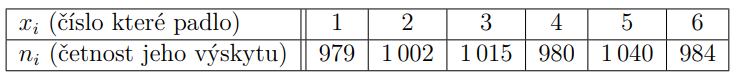

In [ ]:
# H0: Kostka je férová. (tedy všechny pravděpodobnosti jsou 1/6)
# Ha: Kostka není férová. (negace H0)

x <- c(1, 2, 3, 4, 5, 6)
n.obs <- c(979, 1002, 1015, 980, 1040, 984)
p.exp <- c(1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6)
n.exp <- 6000 * p.exp
n.exp # nutno zkontrolovat předpoklady testu
# Všechny očekávané četnosti jsou větší než 5.


In [ ]:
x.obs <- sum(((n.obs - n.exp)^2) / n.exp)
x.obs


In [ ]:
p.hodnota <- 1 - pchisq(x.obs, 5)
p.hodnota

# Na hladině významnosti 0,05 nezamítáme HO (p-hodnota = 0,711,
# Chí-kvadrát test nezávislosti, df = 5).


## Příklad 2.
Výrobní firma odhaduje počet poruch určitého zařízení během 100 hodin pomocí Poissonova
rozdělení s parametrem 1,2. Zaměstnanci zaznamenali pro kontrolu skutečné počty poruch
celkem ve 150 100hodinových intervalech (výsledky jsou uvedeny v tabulce). Ověřte čistým testem významnosti, zda má počet poruch daného zařízení během 100 hodin skutečně Poissonovo
rozdělení s parametrem λt = 1,2.<br>
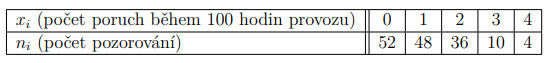

In [ ]:
# Úplně specifikovaný test

# H0: Počet poruch během 100 hodin provozu lze modelovat
#     Poissonovým rozdělením s parametrem 1,2.
# Ha: Počet poruch během 100 hodin provozu nelze modelovat
#     Poissonovým rozdělením s parametrem 1,2.

x <- c(0, 1, 2, 3, 4)
n.obs <- c(52, 48, 36, 10, 4)


In [ ]:
p.exp <- dpois(x, 1.2)
p.exp[5] <- 1 - sum(p.exp[1:4])
p.exp
sum(p.exp)


In [ ]:
n.exp <- 150 * p.exp
n.exp # nutno zkontrolovat předpoklady testu
# 4 z 5 očekávaných četnosti, tj. 80%, jsou větší než 5.


In [ ]:
x.obs <- sum(((n.obs - n.exp)^2) / n.exp)
x.obs


In [ ]:
p.hodnota <- 1 - pchisq(x.obs, 4)
p.hodnota

# Na hladině významnosti 0,05 nezamítáme HO (p-hodnota = 0,590,
# Chí-kvadrát test nezávislosti, df = 4).


## Příklad 3.
Zaměstnanci zaznamenali pro kontrolu počty poruch celkem ve 150 100hodinových intervalech
(výsledky jsou uvedeny v tabulce). Ověřte čistým testem významnosti, zda má počet poruch
daného zařízení během 100 hodin skutečně Poissonovo rozdělení.<br>
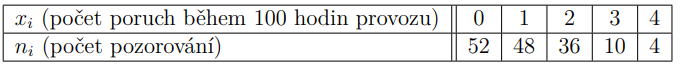

In [ ]:
# Neúplně specifikovaný test

# H0: Počet poruch během 100 hodin provozu lze modelovat
#     Poissonovým rozdělením.
# Ha: Počet poruch během 100 hodin provozu nelze modelovat
#     Poissonovým rozdělením.

x <- c(0, 1, 2, 3, 4)
n.obs <- c(52, 48, 36, 10, 4)

lambda.t <- weighted.mean(x, n.obs) # odhad parametru Poissonova rozdělení
lambda.t


In [ ]:
p.exp <- dpois(x, lambda.t)
p.exp[5] <- 1 - sum(p.exp[1:4])
p.exp
sum(p.exp)


In [ ]:
n.exp <- 150 * p.exp
n.exp # nutno zkontrolovat předpoklady testu
# 4 z 5 očekávaných četnosti, tj. 80%, jsou větší než 5.


In [ ]:
x.obs <- sum(((n.obs - n.exp)^2) / n.exp)
x.obs


In [ ]:
p.hodnota <- 1 - pchisq(x.obs, 3)
p.hodnota

# Na hladině významnosti 0,05 nezamítáme HO (p-hodnota = 0,491,
# Chí-kvadrát test nezávislosti, df = 3).


## Příklad 4. 
Na dálnici byly v průběhu několika minut měřeny časové odstupy (s) mezi průjezdy jednotlivých vozidel. Zjištěné hodnoty těchto odstupů jsou zaznamenány v souboru dalnice.xlsx. Ověřte, zda se jedná o data z normálního rozdělení (použijte test dobré shody).

In [ ]:
# automatický test dobré shody ze spojitých dat

dalnice <- readxl::read_excel("data/neparametricke_hypotezy.xlsx", sheet = 2)
colnames(dalnice) <- "hodnoty"
head(dalnice)


In [ ]:
mu <- mean(dalnice$hodnoty)
sigma <- sd(dalnice$hodnoty)
mu
sigma


In [ ]:
# generování hodnot pro osu x
xfit <- seq(from = -20, to = 30, length = 100)
# generování hodnot pro osu y
yfit <- dnorm(xfit, mean = mu, sd = sigma)

hist(dalnice$hodnoty, freq = FALSE, xlim = c(-20, 30))
# do posledního grafu přidání křivky na základě výše vygenerovaných hodnot
lines(xfit, yfit, col = "black", lwd = 2)


In [ ]:
# install.packages("nortest")


In [ ]:
# H0: Rozestupy mezi vozidly lze modelovat normálním rozdělením.
# Ha: Rozestupy mezi vozidly nelze modelovat normálním rozdělením.

nortest::pearson.test(dalnice$hodnoty)


In [ ]:
# Určení počtu stupňů volbnosti
pom <- nortest::pearson.test(dalnice$hodnoty, n.classes = 5)
attributes(pom)


In [ ]:
pom$method
pom$n.classes
pom$df
pom$p.value

# Na hladině významnosti 0,05 lze zamítnout HO (p-hodnota << 0,001,
# Chí-kvadrát test dobré shody, df = 12).


In [ ]:
# test co už znáte
shapiro.test(dalnice$hodnoty)


# Příklady na kontingenční a asociační tabulky
## Příklad 5.
Rozhodněte na základě datového souboru experimentovani-s-telem.xls (Dudová, J. - Experimentování s tělem (výsledky průzkumu), 2013. Dostupné online na http://experimentovani-stelem.vyplnto.cz), zda existuje souvislost mezi pohlavím respondentů a tím, zda mají tetování. Pro posouzení míry kontingence použijte Cramerovo V.

In [ ]:
tet <- readxl::read_excel("data/neparametricke_hypotezy.xlsx", sheet = 3)
head(tet)


In [ ]:
tet <- tet[, c(6, 10)]
colnames(tet) <- c("pohlavi", "tetovani")
head(tet)


In [ ]:
# Preprocessing
# Varianty kat. proměnných (faktorů) je nutné uspořádat a pojmenovat tak,
# jak mají být uspořádány a pojmenovány v kont. tabulce


kont.tab <- table(tet$pohlavi, tet$tetovani)
kont.tab


In [ ]:
colnames(kont.tab) <- c("má tetování", "nemá tetování")
kont.tab


In [ ]:
# Explorační analýza
prop.table(kont.tab) # sdružené relativní četnosti
prop.table(kont.tab, 1) # řádkové relativní četnosti
prop.table(kont.tab, 2) # sloupcové relativní četnosti


In [ ]:
# Vizualizace ve standardním R
# Shlukový sloupcový graf
# srovnejte grafy, který z grafů je pro prezentaci daných dat vhodnější

options(repr.plot.width = 12) # šířka grafů v Jupyteru
par(mfrow = c(1, 2)) # matice grafů 1x2

barplot(t(kont.tab),
        legend = colnames(kont.tab),
        beside = TRUE
)

barplot(kont.tab,
        legend = rownames(kont.tab),
        beside = TRUE
)


In [ ]:
# Skládaný sloupcový graf

options(repr.plot.width = 12) # šířka grafů v Jupyteru
par(mfrow = c(1, 2)) # matice grafů 1x2

barplot(t(kont.tab),
        legend = colnames(kont.tab)
)

barplot(kont.tab,
        legend = rownames(kont.tab)
)


In [ ]:
# Mozaikový graf

options(repr.plot.width = 8) # šířka grafů v Jupyteru

mosaicplot(t(kont.tab),
    las = 1, # otočení popisků osy y
    color = gray.colors(2)
)

# srovnejte, který z grafů je pro prezentaci daných dat vhodnější
mosaicplot(kont.tab,
    las = 1,
    color = gray.colors(2)
)


In [ ]:
# install.packages("lsr")


In [ ]:
# Výpočet Cramerova V ####
lsr::cramersV(kont.tab)


In [ ]:
# Test nezávislosti v kontingenční tabulce

# H0: Data jsou nezávislá -> to jestli je jedinec muž nebo žena
# neovlivní jeho pravděpodobnost, že budemít tetování
# HA: negace H0 (existuje závislost)

pom <- chisq.test(kont.tab)
attributes(pom)


In [ ]:
pom$expected # Nutné pro ověření předpokladů
# Všechny očekávané četnosti jsou větší než 5.


In [ ]:
pom

# Na hladině významnosti 0,05 lze zamítnout HO (p-hodnota = 0,003,
# Chí-kvadrát test dobré shody, df = 1).
# Pozorovanou závislost lze hodnotit jako slabou (Cramerovo V = 0,121).


## Příklad 6.
Pro diferencovaný přístup v personální politice potřebuje vedení podniku vědět, zda spokojenost v práci závisí na tom, jedná-li se o pražský závod či závody mimopražské. Výsledky šetření jsou v následující tabulce. Zobrazte data pomocí mozaikového grafu a na základě testu nezávislosti v kombinační tabulce rozhodněte o závislosti spokojenosti v zaměstnání na umístnění podniku. Pro posouzení míry kontingence použijte Cramerovo V.<br>
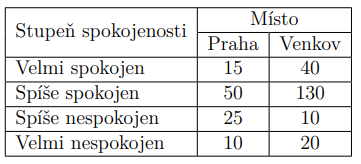

In [ ]:
# Nemáme k dispozici datovou matici, tj. kont. tabulku musíme zadat "ručně"
kont.tab <- matrix(c(10, 25, 50, 15, 20, 10, 130, 40),
    nrow = 2, byrow = TRUE
)
rownames(kont.tab) <- c("Praha", "Venkov")
colnames(kont.tab) <- c(
    "velmi nespokojen", "spíše nespokojen",
    "spíše spokojen", "velmi spokojen"
)
kont.tab <- as.table(kont.tab)
kont.tab


In [ ]:
# Explorační analýza ####
prop.table(kont.tab) # sdružené relativní četnosti
prop.table(kont.tab, 1) # řádkové relativní četnosti
prop.table(kont.tab, 2) # sloupcové relativní četnosti


In [ ]:
# Vizualizace ve standardním R
# Mozaikový graf
mosaicplot(kont.tab,
    las = 1, # otočení popisků osy y o 90
    color = gray.colors(4)
)


In [ ]:
# Cramerovo V
lsr::cramersV(kont.tab)


In [ ]:
# H0: Mezi spokojenosti v práci a umístěním podniku neexistuje souvislost.
# Ha: Mezi spokojenosti v práci a umístěním podniku existuje souvislost.

# Chí-kvadrát test nezávislosti v kontingenční tabulce ####
pom <- chisq.test(kont.tab)
pom$expected
# Všechny očekávané četnosti jsou větší než 5.


In [ ]:
pom

# Na hladině významnosti 0,05 lze zamítnout HO (p-hodnota << 0,001,
# Chí-kvadrát test dobré shody, df = 3).
# Pozorovanou závislost lze hodnotit jako středně silnou (Cramerovo V = 0,296)


## Příklad 7. (Asociační tabulka)
V letech 1965 až 1968 bylo v kohortové studii kardiovaskulárních onemocnění v rámci „Honolulu Heart Program“ zahájeno sledování 8 006 mužů, z nichž 7 872 nemělo při zahájení studie v anamnéze mrtvici (apoplexii). Z tohoto počtu bylo 3 435 kuřáků a 4 437 nekuřáků. Při jejich sledování po dobu 12 let dostalo mrtvici 171 mužů ve skupině kuřáků a 117 mužů ve skupině nekuřáků. 
#### a) 
Zapište zjištěné výsledky do asociační tabulky.

In [ ]:
kont.tab <- matrix(c(171, 3264, 117, 4320), nrow = 2, byrow = TRUE)
rownames(kont.tab) <- c("kuřák", "nekuřák")
colnames(kont.tab) <- c("ano", "ne")
kont.tab


In [ ]:
# doplnění tabulky absolutních četností
kont.tab.full <- matrix(rep(0, 9), nrow = 3, ncol = 3)
rownames(kont.tab.full) <- c("kuřák", "nekuřák", "sum")
colnames(kont.tab.full) <- c("ano", "ne", "sum")

kont.tab.full[1:2, 1:2] <- kont.tab
kont.tab.full[1:2, 3] <- rowSums(kont.tab)
kont.tab.full[3, 1:2] <- colSums(kont.tab)
kont.tab.full[3, 3] <- sum(kont.tab)
kont.tab.full


In [ ]:
# doplnění tabulky relativních četností
kont.tab.rel <- matrix(rep(0, 9), nrow = 3, ncol = 3)
rownames(kont.tab.rel) <- c("kuřák", "nekuřák", "sum")
colnames(kont.tab.rel) <- c("ano", "ne", "sum")

kont.tab.rel[1:2, 1:2] <- prop.table(kont.tab)
kont.tab.rel[1:2, 3] <- rowSums(kont.tab.rel[1:2, 1:2])
kont.tab.rel[3, 1:2] <- colSums(kont.tab.rel[1:2, 1:2])
kont.tab.rel[3, 3] <- sum(kont.tab.rel[1:2, 1:2])
kont.tab.rel


#### b)
Na základě vizuálního posouzení odhadněte vliv kouření na výskyt kardiovaskulárních onemocnění.

In [ ]:
# Vizualizace mozaikovým grafem v základním R
mosaicplot(kont.tab,
    color = gray.colors(2)
)


In [ ]:
# Výpočet Cramerova V ####
lsr::cramersV(kont.tab)

# Dle mozaikového grafu a Cramerova V (0,061) lze souvislost mezi kuřáctvím
# a výskytem apoplexie hodnotit jako velmi slabou.


#### c)
Určete absolutní riziko vzniku kardiovaskulárních onemocnění u kuřáků a nekuřáků.

In [ ]:
# riziko = pravděpodobnost
kont.tab.full


In [ ]:
# Kuřáci
# Kontrola předpokladů
p <- 171 / 3435
p


In [ ]:
9 / (p * (1 - p))
# OK (3 435 > 190,3)


In [ ]:
# Výpočet bodového a 95% Clopperova-Pearsonova intervalového odhadu
prop.test(x = 171, n = 3435)

# U kuřáku je riziko vzniku apoplexie cca 5,0 %. 95% Clopperův-Pearsonův
# intervalový odhad tohoto rizika je 4,2 % až 5,8 %.


In [ ]:
# Nekuřáci
# Kontrola předpokladů
p <- 117 / 4437
p


In [ ]:
9 / p / (1 - p)
# OK (4 437 > 350,6)


In [ ]:
# Výpočet bodového a 95% Clopperova-Pearsonova intervalového odhadu
prop.test(117, 4437)

# U nekuřáku je riziko vzniku apoplexie cca 2,6 %. 95% Clopperův-Pearsonův
# intervalový odhad tohoto rizika je 2,1 % až 3,2 %.


#### d)
Určete relativní riziko (včetně 95% intervalového odhadu) vzniku kardiovaskulárních onemocnění u kuřáků a nekuřáků. Vysvětlete praktický význam zjištěných výsledků.

In [ ]:
# install.packages("epiR")


In [ ]:
kont.tab


In [ ]:
epiR::epi.2by2(kont.tab)

# U kuřáků je cca 1,89 krát vyšší riziko apoplexie než u nekuřáků. 95%
# intervalový odhad tohoto relativního rizika je 1,50 až 2,38.
# Dle intervalového odhadu relativního rizika je zřejmé, že na hladině
# významnosti 0,05 je u kuřáků statisticky významně vyšší riziko vzniku
# apoplexie než u nekuřáků.


#### e)
Určete absolutní šance vzniku kardiovaskulárních onemocnění u kuřáků a nekuřáků.

In [ ]:
# U kuřáku je šance vzniku apoplexie cca 52:1 000. Tj. u 1 052 kuřáků
# lze očekávat cca 52 výskytů apoplexie.
# U nekuřáku je šance vzniku apoplexie cca 27:1 000. Tj. u 1 027 nekuřáků
# lze očekávat cca 27 výskytů apoplexie.


 #### f)
 Určete relativní šance vzniku kardiovaskulárních onemocnění u kuřáků.

In [ ]:
# U kuřáků je cca 1,93 (= 0,0524/0,0271) krát vyšší šance apoplexie
# než u nekuřáků. 95% intervalový odhad tohoto poměru
# šancí je 1,52 až 2,46.
# Dle intervalového odhadu poměru šancí je zřejmé, že na hladině
# významnosti 0,05 je u kuřáků
# statisticky významně vyšší šance na vznik apoplexie než u nekuřáků.


#### g)
Rozhodněte na hladině významnosti 0,05 o závislosti výskytu kardiovaskulárních chorob na kouření.

In [ ]:
# Pozor! Příkaz epi.2by2 nemá jako výstup očekávané četnosti pro
# Chí-kvadrát test nezávislosti.
# Není tak možno ověřit předpoklady testu!

# H0: Mezi kouřením a výskytem apoplexie neexistuje souvislost.
# Ha: Mezi kouřením a výskytem apoplexie existuje souvislost.

pom <- chisq.test(kont.tab)
pom$expected
# Všechny očekávané četnosti jsou větší než 5.


In [ ]:
pom


In [ ]:
lsr::cramersV(kont.tab)

# Na hladině významnosti 0,05 lze zamítnout HO (p-hodnota << 0,001,
# Chí-kvadrát test dobré shody,
# df = 1). Pozorovanou závislost lze hodnotit jako velmi slabou
# (Cramerovo V = 0,061).
